# This notebook contains the code to reproduce all the necessary plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
epsilon = np.linspace(0, 1, 20)
from scipy import stats
from utils import *

In [2]:
def all_metrics(path1, path2, path3, colnum, epsilon):
    """
    Funstion to compute and return the stats for the files
    
    Parameters
    ----------------------
    path1: str, the file path to the model_dataset & validation_set
    path2: str, the file path to the model_dataset & validation_set in batches
    path3: str, the file path to the model_dataset & validation adversarial samples in batches
    colnum: int, metrics column to choose in model_dataset & validation adv samples in batches 
            0 - density, 1 - coverage
    epsilon: np. array, the epsilon values
    
    Return
    ----------------------
    nmodel_vali - float, the metric between model_dataset & validation_set
    nmodel_vali_adv - np.array, the metric model_dataset & validation adv samples (len(epsilon), 1)
    bmodel_vali - np.array, the metric between model_dataset & validation set in batches
    q0, q25, q50, q75 - nparray, the 0, 25, 50, 75 quantile for model_dataset 
                & validation samples in batches (metric), size: len(epsilon)
    quantiles - np.array, the 0, 25, 50, 75 quantile for each batch of model_dataset & 
                validation adversarial samples in batches (metric), size: len(epsilon), 4
    quantities - np.array, the mean, median and mode for each batch of model_dataset & 
                validation adversarial samples in batches (metric), size: len(epsilon), 4 
    
    """
    
    # read the model_dataset & validation_set -> metric
    # read the model_dataset & validation adversarial sample -> metric (colnum: 1- density, colnum: 2 - coverage)
    df_nmodel_vali = pd.read_csv(path1, header=None, nrows=4)
    df_nmodel_vali_adv = pd.read_csv(path1, header=None, skiprows=4, sep=" ")
    
    # read the model_dataset & validation_set -> metric in batches
    # read the model_dataset & validation adversarial samples -> metric in batches
    df_bmodel_vali_metrics = pd.read_csv(path2, header=None, skiprows=4, sep=" ")
    df_bmodel_vali_adv_metrics = pd.read_csv(path3, header=None, skiprows=4, sep=" ")
    
    # nmodel_vali -> model_dataset & validation_set -> metric (1 value)
    # nmodel_vali_adv -> model_dataset & validation adversarial sample (length of epsilons)
    df_nmodel_vali = pd.read_csv(path1, header=None, nrows=4)
    nmodel_vali = float((list(df_nmodel_vali.iloc[3].values))[0].split()[-1])
    nmodel_vali_adv = df_nmodel_vali_adv.iloc[:, -1].values
    
    # bmodel_vali -> model_dataset & validation_set -> metric (batch size X 1)
    # bmodel_vali_adv -> model_dataset & validation adversarial samples -> metric in batches (batch_size x len(epsilons))
    # colnum1: 0- density, colnum: 1 - coverage)
    bmodel_vali = df_bmodel_vali_metrics.iloc[:, colnum].values
    bmodel_vali_adv = df_bmodel_vali_adv_metrics.iloc[:, colnum].values
    
    
    quantiles = [] # store quantile info
    quantities= [] # store stats info
    for i in range(len(epsilon)):
        values = bmodel_vali_adv[i:1060:20]
        val,cnt = np.unique(values, return_counts=True)
        idx = np.argmax(cnt)
        qvalues = np.quantile(values, [0, 0.25, 0.5, 0.75])
        quantiles.append(qvalues)
        quantities.append([np.mean(values), np.median(values), val[idx], np.std(values)])
    
    quantiles = np.array(quantiles)
    quantities = np.array(quantities)
    
    q = np.quantile(bmodel_vali, [0, 0.25, 0.5, 0.75])
    q0 = np.repeat(q[0], len(epsilon))
    q25 = np.repeat(q[1], len(epsilon))
    q50 = np.repeat(q[2], len(epsilon))
    q75 = np.repeat(q[3], len(epsilon))
    
    nmodel_vali = np.repeat(nmodel_vali, len(epsilon))
    
    return nmodel_vali, bmodel_vali, nmodel_vali_adv , q0, q25, q50, q75, quantiles, quantities, bmodel_vali_adv    

#### Density of all the datasets

In [4]:
# mnist
nmodel_vali_den1, bmodel_vali_den1, nmodel_vali_adv_den1, den_q01, den_q251, den_q501, den_q751, den_quantiles1, den_quantities1,_ = all_metrics('metrics_files/fgsm/mnist/FGSM_attack_density.dat', 'metrics_files/fgsm/mnist/FGSM_attack_42batch_metrics.dat',
                                                                                                                 'metrics_files/fgsm/mnist/FGSM_attack_42batch_adv_metrics.dat', 0, epsilon)

# organmnist
nmodel_vali_den3, bmodel_vali_den3, nmodel_vali_adv_den3, den_q03, den_q253, den_q503, den_q753, den_quantiles3, den_quantities3,_= all_metrics('metrics_files/fgsm/organmnist/FGSM_attack_organmnist_density.dat', 'metrics_files/fgsm/organmnist/FGSM_attack_organmnist_100batch_metrics.dat',
                                                                                                                 'metrics_files/fgsm/organmnist/FGSM_attack_organmnist_100batch_adv_metrics.dat', 0, epsilon)

# pathmnist
nmodel_vali_den2, bmodel_vali_den2, nmodel_vali_adv_den2, den_q02, den_q252, den_q502, den_q752, den_quantiles2, den_quantities2,_= all_metrics('metrics_files/fgsm/pathmnist/FGSM_attack_pathmnist_density.dat', 'metrics_files/fgsm/pathmnist/FGSM_attack_pathmnist_100batch_metrics.dat',
                                                                                                                 'metrics_files/fgsm/pathmnist/FGSM_attack_pathmnist_100batch_adv_metrics.dat', 0, epsilon)

#### Coverage of all the datasets

In [6]:
# mnist
nmodel_vali_cov1,_, nmodel_vali_adv_cov1, _, cov_q251, cov_q501, cov_q751, cov_quantiles1, _,_ = all_metrics('metrics_files/fgsm/mnist/FGSM_attack_coverage.dat', 'metrics_files/fgsm/mnist/FGSM_attack_42batch_metrics.dat',
                                                                                                                 'metrics_files/fgsm/mnist/FGSM_attack_42batch_adv_metrics.dat', 1, epsilon)

# pathmnist
nmodel_vali_cov2,_, nmodel_vali_adv_cov2, _, cov_q252, cov_q502, cov_q752, cov_quantiles2, _,_ = all_metrics('metrics_files/fgsm/pathmnist/FGSM_attack_pathmnist_coverage.dat', 'metrics_files/fgsm/pathmnist/FGSM_attack_pathmnist_100batch_metrics.dat',
                                                                                                                 'metrics_files/fgsm/pathmnist/FGSM_attack_pathmnist_100batch_adv_metrics.dat', 1, epsilon)
# orgmnist
nmodel_vali_cov3,_, nmodel_vali_adv_cov3, _, cov_q253, cov_q503, cov_q753, cov_quantiles3, _,_ = all_metrics('metrics_files/fgsm/organmnist/FGSM_attack_organmnist_coverage.dat', 'metrics_files/fgsm/organmnist/FGSM_attack_organmnist_100batch_metrics.dat',
                                                                                                                 'metrics_files/fgsm/organmnist/FGSM_attack_organmnist_100batch_adv_metrics.dat', 1, epsilon)


In [5]:
def read_func(path1, colnum):
    df_nmodel_vali = pd.read_csv(path1, header=None, nrows=4)
    nmodel_vali = float((list(df_nmodel_vali.iloc[3].values))[0].split()[-1])
    nmodel_vali = np.repeat(nmodel_vali, len(epsilon))
    
    df_bmodel_vali_adv_metrics = pd.read_csv(path1, header=None, skiprows=4, sep=" ")
    
    bmodel_vali_adv = df_bmodel_vali_adv_metrics.iloc[:, colnum].values
    
    return nmodel_vali, bmodel_vali_adv
    
    

To the plot D&C in the same subplot, add the respective values into a dict.

In [7]:
# denisty values
group ={"nmodel_vali_den1": nmodel_vali_den1, "nmodel_vali_adv_den1":nmodel_vali_adv_den1, "den_quantiles1":den_quantiles1, "den_q251":den_q251,"den_q501":den_q501,"den_q751":den_q751,
       "nmodel_vali_den2": nmodel_vali_den2, "nmodel_vali_adv_den2":nmodel_vali_adv_den2, "den_quantiles2":den_quantiles2, "den_q252":den_q252,"den_q502":den_q502,"den_q752":den_q752,
       "nmodel_vali_den3": nmodel_vali_den3, "nmodel_vali_adv_den3":nmodel_vali_adv_den3, "den_quantiles3":den_quantiles3, "den_q253":den_q253,"den_q503":den_q503,"den_q753":den_q753}

In [8]:
# coverage values
group_cov = {"nmodel_vali_cov1": nmodel_vali_cov1, "nmodel_vali_adv_cov1":nmodel_vali_adv_cov1, "cov_quantiles1":cov_quantiles1, "cov_q251":cov_q251,"cov_q501":cov_q501,"cov_q751":cov_q751,
             "nmodel_vali_cov2":nmodel_vali_cov2,"nmodel_vali_adv_cov2":nmodel_vali_adv_cov2, "cov_quantiles2":cov_quantiles2, "cov_q252":cov_q252,"cov_q502":cov_q502,"cov_q752":cov_q752,
             "nmodel_vali_cov3":nmodel_vali_cov3, "nmodel_vali_adv_cov3":nmodel_vali_adv_cov3, "cov_quantiles3":cov_quantiles3, "cov_q253":cov_q253,"cov_q503":cov_q503,"cov_q753":cov_q753}

## Plot

- ```model_vali``` --> model_dataset(22000 images stratified split) and validation set **[1 value]**
- ```model_vali_adv``` --> model_dataset(22000 images stratified split) and validation adversarial samples **[20 values, 1 for each epsilon]**

In the plots, the uncertainity band was constructed by
 - for each epsilon, 
     - consider the metric value(density/coverage) for the batch of images
     - compute the quantiles for this batch
     - repeat for each epsilon

#### Plot for density along with bands

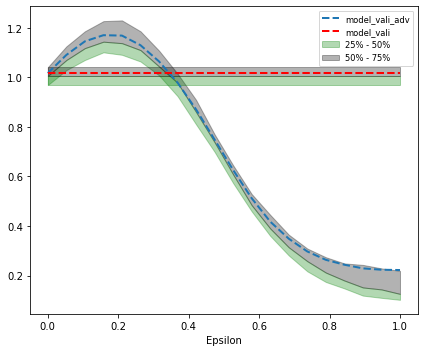

In [23]:
fig,ax = plt.subplots(figsize=(6, 5))
ax.plot(epsilon, nmodel_vali_adv_den, label='model_vali_adv', lw=2, ls='--')
#ax.fill_between(epsilon, den_quantiles[:,0], den_quantiles[:,1], color='b', alpha=0.3, label='25%')
ax.fill_between(epsilon, den_quantiles[:,1], den_quantiles[:,2], color='g', alpha=0.3, label='25% - 50%')
ax.fill_between(epsilon, den_quantiles[:,2], den_quantiles[:,3], color='k', alpha=0.3, label='50% - 75%')
ax.plot(epsilon, nmodel_vali_den, ls='--', lw=2, c='r', label='model_vali')
#ax.fill_between(epsilon, den_q0, den_q25, color='b', alpha=0.3)
ax.fill_between(epsilon, den_q25, den_q50, color='g', alpha=0.3)
ax.fill_between(epsilon, den_q50, den_q75, color='k', alpha=0.3)
ax.set_xlabel("Epsilon")
#ax.set_ylabel("Density")
#ax.grid()
#ax.set_title("FGSM attack Density")
ax.legend(loc='upper right', fontsize='small')
fig.tight_layout()
plt.savefig("FGSM_attack_orgmnist_density_paper.png")

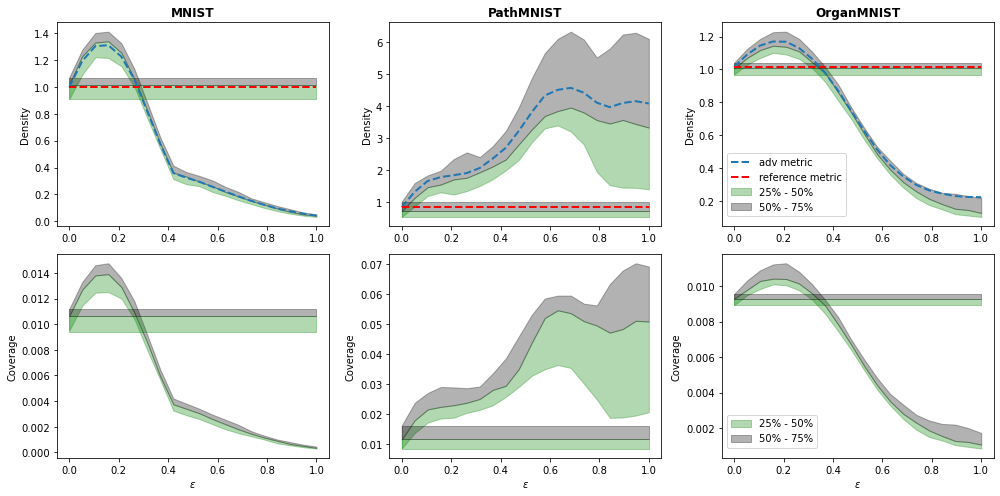

In [11]:
fig,ax = plt.subplots(2, 3, figsize=(14, 7))
title = ["MNIST", "PathMNIST", "OrganMNIST"]
for i in range(2):
    for j in range(3):
        if(i==0):
            ax[i,j].plot(epsilon, group["nmodel_vali_adv_den"+str(j+1)], label='adv metric', lw=2, ls='--')
            ax[i,j].fill_between(epsilon, group["den_quantiles"+str(j+1)][:,1], group["den_quantiles"+str(j+1)][:,2], color='g', alpha=0.3, label='25% - 50%')
            ax[i,j].fill_between(epsilon, group["den_quantiles"+str(j+1)][:,2], group["den_quantiles"+str(j+1)][:,3], color='k', alpha=0.3, label='50% - 75%')

            ax[i,j].plot(epsilon, group["nmodel_vali_den"+str(j+1)], ls='--', lw=2, c='r', label='reference metric')
            ax[i,j].fill_between(epsilon, group["den_q25"+str(j+1)], group["den_q50"+str(j+1)], color='g', alpha=0.3)
            ax[i,j].fill_between(epsilon, group["den_q50"+str(j+1)], group["den_q75"+str(j+1)], color='k', alpha=0.3)
            ax[i,j].set_ylabel("Density")
            ax[i,j].set_title(title[j], fontweight="bold")
        else:
            #ax[i,j].plot(epsilon, group_cov["nmodel_vali_adv_cov"+str(j+1)], label='adv metric', lw=2, ls='--')
            #ax[i,j].plot(epsilon, group_cov["nmodel_vali_cov"+str(j+1)], ls='--', lw=2, c='r', label='reference metric')
            ax[i,j].fill_between(epsilon, group_cov["cov_quantiles"+str(j+1)][:,1], group_cov["cov_quantiles"+str(j+1)][:,2], color='g', alpha=0.3, label='25% - 50%')
            ax[i,j].fill_between(epsilon, group_cov["cov_quantiles"+str(j+1)][:,2], group_cov["cov_quantiles"+str(j+1)][:,3], color='k', alpha=0.3, label='50% - 75%')
            ax[i,j].fill_between(epsilon, group_cov["cov_q25"+str(j+1)], group_cov["cov_q50"+str(j+1)], color='g', alpha=0.3)
            ax[i,j].fill_between(epsilon, group_cov["cov_q50"+str(j+1)], group_cov["cov_q75"+str(j+1)], color='k', alpha=0.3)
            ax[i,j].set_ylabel("Coverage")
            ax[i,j].set_xlabel(r'$\epsilon$')
        if(j==2):
                ax[i,j].legend(loc=(0.02, 0.05), fontsize='medium') 
                
#handles, labels = ax.get_legend_handles_labels()
plt.tight_layout()
#plt.savefig('fgsm_combined.png', bbox_inches = 'tight') 

### Plot the metrics for mixture of adv. samples

- random mix of adv. samples into validation_Set
- Columns in file: Epsilon | Model_accuracy | density | coverage

In [32]:
def mixture(f1,f2,f3,f4,f5, epi):
    df_den = pd.read_csv(f1, header=None, nrows=4)
    df_cov = pd.read_csv(f2, header=None, nrows=4)
    
    df_den_adv = pd.read_csv(f1, header=None, skiprows=4, sep=" ")
    df_cov_adv = pd.read_csv(f2, header=None, skiprows=4, sep=" ")
    
    
    den_adv = df_den_adv.iloc[:, -1].values
    cov_adv = df_cov_adv.iloc[:, -1].values
    
    den_ = float((list(df_den.iloc[3].values))[0].split()[-1])
    cov_ = float((list(df_cov.iloc[3].values))[0].split()[-1])
    
    den = np.repeat(den_, len(epi))
    cov = np.repeat(cov_, len(epi))
    
    mix25 = pd.read_csv(f3, header=None, skiprows=4, sep=" ").iloc[:,:].values
    mix50 = pd.read_csv(f4, header=None, skiprows=4, sep=" ").iloc[:,:].values
    mix75 = pd.read_csv(f5, header=None, skiprows=4, sep=" ").iloc[:,:].values
    
    return den, den_adv, cov, cov_adv, mix25, mix50, mix75

In [33]:
den1, den_adv1, cov1, cov_adv1, mix251, mix501, mix751 = mixture('metrics_files/FGSM_attack_density.dat', 'metrics_files/FGSM_attack_coverage.dat', 'metrics_files/fgsm/mnist_mix/FGSM_attack_mnist_NewNet_25randmix_valiadv.dat',
                                      'metrics_files/fgsm/mnist_mix/FGSM_attack_mnist_NewNet_50randmix_valiadv.dat', 'metrics_files/fgsm/mnist_mix/FGSM_attack_mnist_NewNet_75randmix_valiadv.dat', epsilon)

den2, den_adv2, cov2, cov_adv2, mix252, mix502, mix752 = mixture('metrics_files/fgsm/pathmnist/FGSM_attack_pathmnist_NewNet_30model_density.dat','metrics_files/fgsm/pathmnist/FGSM_attack_pathmnist_NewNet_30model_coverage.dat', 'metrics_files/fgsm/pathmnist/mix/FGSM_attack_pathmnist_3C_NewNet_25randmix_valiadv.dat',
                                      'metrics_files/fgsm/pathmnist/mix/FGSM_attack_pathmnist_3C_NewNet_50randmix_valiadv.dat', 'metrics_files/fgsm/pathmnist/mix/FGSM_attack_pathmnist_3C_NewNet_75randmix_valiadv.dat', epsilon)

den3, den_adv3, cov3, cov_adv3, mix253, mix503, mix753 = mixture('metrics_files/fgsm/organmnist/FGSM_attack_organmnist_NewNet_density.dat','metrics_files/fgsm/organmnist/FGSM_attack_organmnist_NewNet_coverage.dat', 'metrics_files/fgsm/organmnist/mix/FGSM_attack_organmnist_NewNet_25randmix_valiadv.dat',
                                            'metrics_files/fgsm/organmnist/mix/FGSM_attack_organmnist_NewNet_50randmix_valiadv.dat', 'metrics_files/fgsm/organmnist/mix/FGSM_attack_organmnist_NewNet_75randmix_valiadv.dat', epsilon)

In [34]:
mix_group = {"den1":den1, "den_adv1":den_adv1, "cov1":cov1, "cov_adv1":cov_adv1, "mix251":mix251, "mix501":mix501, "mix751":mix751,
            "den2":den2, "den_adv2":den_adv2, "cov2":cov2, "cov_adv2":cov_adv2, "mix252":mix252, "mix502":mix502, "mix752":mix752,
            "den3":den3, "den_adv3":den_adv3, "cov3":cov3, "cov_adv3":cov_adv3, "mix253":mix253, "mix503":mix503, "mix753":mix753}

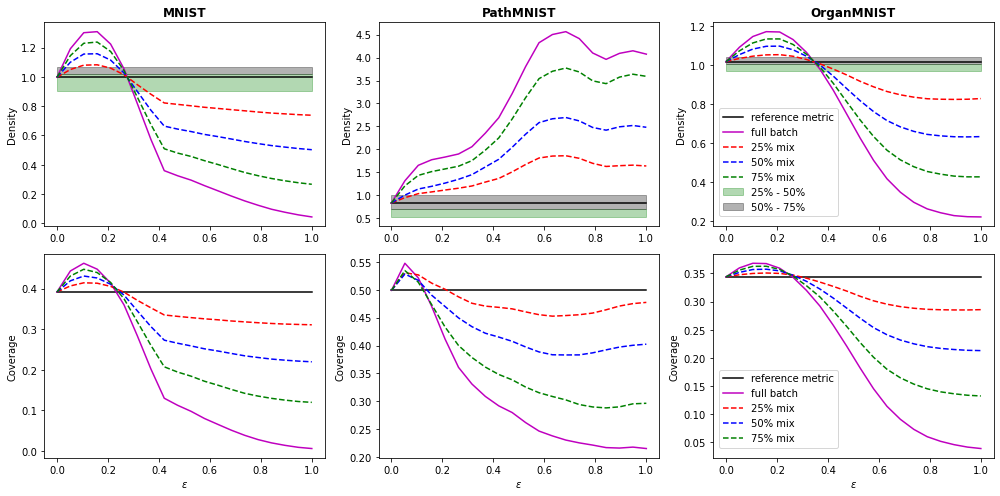

In [43]:
fig,ax = plt.subplots(2, 3, figsize=(14, 7))
title = ["MNIST", "PathMNIST", "OrganMNIST"]
for i in range(2):
    for j in range(3):
        if(i==0):
            ax[i,j].plot(epsilon, mix_group["den"+str(j+1)], c='k', label='reference metric')
            ax[i,j].fill_between(epsilon, group["den_q25"+str(j+1)], group["den_q50"+str(j+1)], color='g', alpha=0.3, label='25% - 50%')
            ax[i,j].fill_between(epsilon, group["den_q50"+str(j+1)], group["den_q75"+str(j+1)], color='k', alpha=0.3, label='50% - 75%')
            ax[i,j].plot(epsilon, mix_group["den_adv"+str(j+1)], c='m', ls='-',label='full batch')
            ax[i,j].plot(epsilon, mix_group["mix25"+str(j+1)][:, 2], c='r', ls='--', label='25% mix')
            ax[i,j].plot(epsilon, mix_group["mix50"+str(j+1)][:, 2], c='b', ls='--', label='50% mix')
            ax[i,j].plot(epsilon, mix_group["mix75"+str(j+1)][:, 2], c='g', ls='--', label='75% mix')
            ax[i,j].set_ylabel("Density")
            ax[i,j].set_title(title[j], fontweight="bold")
        else:
            ax[i,j].plot(epsilon, mix_group["cov"+str(j+1)], c='k', label='reference metric')
            ax[i,j].plot(epsilon, mix_group["cov_adv"+str(j+1)], c='m', ls='-',label='full batch')
            ax[i,j].plot(epsilon, mix_group["mix25"+str(j+1)][:, -1], c='r', ls='--', label='25% mix')
            ax[i,j].plot(epsilon, mix_group["mix50"+str(j+1)][:, -1], c='b', ls='--', label='50% mix')
            ax[i,j].plot(epsilon, mix_group["mix75"+str(j+1)][:, -1], c='g', ls='--', label='75% mix')
            ax[i,j].set_ylabel("Coverage")
            ax[i,j].set_xlabel(r'$\epsilon$')
        if(j==2):
                ax[i,j].legend(loc=(0.02, 0.05), fontsize='medium') 
                
#handles, labels = ax.get_legend_handles_labels()
plt.tight_layout()
plt.savefig('fgsm_mix_combined.png', bbox_inches = 'tight') 

-------------------------------------------------------------------------------------------------------------------------------

# Boundary Attack

## Plot the metrics for the Boundary attack

### For each metric batch file
- read model & validation density & coverage - ```bmodel_validation_den/cov```
- compute quantile and stats for the same - ```bmodel_validation_den/cov_q/s```

- read model & adv. density & coverage - ```bmodel_validation_adv_den/cov```
- compute quantile and stats for the same - ```bmodel_validation_adv_den/cov_q/s```

- convert into np.array

In [8]:
prefix1 = [21, 42, 60, 84, 120, 140] # mnist
prefix2 = [53, 100, 150, 200, 250, 300] #pathmnist
prefix3 = [49, 100, 150, 200, 250, 300] #organmnist

den_q1, adv_den_q1, den_s1, adv_den_s1, cov_q1, adv_cov_q1, cov_s1, adv_cov_s1 = bdy_process('metrics_files/bdy_attack/Boundary_attack_',prefix1,'batch_metrics.dat')
den_q11, adv_den_q11, den_s11, adv_den_s11, cov_q11, adv_cov_q11, cov_s11, adv_cov_s11 = bdy_process('metrics_files/bdy_attack/Boundary_attack_metrics.dat', dataset=True)

den_q2, adv_den_q2, den_s2, adv_den_s2, cov_q2, adv_cov_q2, cov_s2, adv_cov_s2 = bdy_process('metrics_files/bdy_attack/Boundary_attack_pathmnist_', prefix2, 'batch_metrics.dat')
den_q3, adv_den_q3, den_s3, adv_den_s3, cov_q3, adv_cov_q3, cov_s3, adv_cov_s3 = bdy_process('metrics_files/bdy_attack/Boundary_attack_organmnist_', prefix3, 'batch_metrics.dat')
#df_bdy_attack_data = pd.read_csv(('metrics_files/bdy_attack/Boundary_attack_organmnist_'+str(i)+'batch_metrics.dat'), header=None, sep=" ", skiprows=7)
    

In [9]:
group = {"den_q1":ins(den_q1,4,den_q11), "adv_den_q1":ins(adv_den_q1,4,adv_den_q11), "den_s1":ins(den_s1,4,den_s11),"adv_den_s1":ins(adv_den_s1,4,adv_den_s11), "cov_q1":ins(cov_q1,4,cov_q11),"adv_cov_q1":ins(adv_cov_q1,4,adv_cov_q11),"cov_s1":ins(cov_s1,4,cov_s11),"adv_cov_s1":ins(adv_cov_s1,4,adv_cov_s11),
         "den_q2":den_q2,"adv_den_q2":adv_den_q2,"den_s2":den_s2,"adv_den_s2":adv_den_s2,"cov_q2":cov_q2,"adv_cov_q2":adv_cov_q2,"cov_s2":cov_s2,"adv_cov_s2":adv_cov_s2,
         "den_q3":den_q3,"adv_den_q3":adv_den_q3,"den_s3":den_s3,"adv_den_s3":adv_den_s3,"cov_q3":cov_q3,"adv_cov_q3":adv_cov_q3,"cov_s3":cov_s3,"adv_cov_s3":adv_cov_s3
            }

In [16]:
prefix1 = [21, 42, 60, 84, 100, 120, 140] # mnist
myticks=['20','40','60','80','100','120','140']
myticks1=['50','100','150','200','250','300']

In [15]:
group["prefix1"] = prefix1;group["prefix2"]=prefix2;group["prefix3"]=prefix3

In [17]:
group["myticks1"] = myticks; group["myticks2"]=myticks1; group["myticks3"]=myticks1

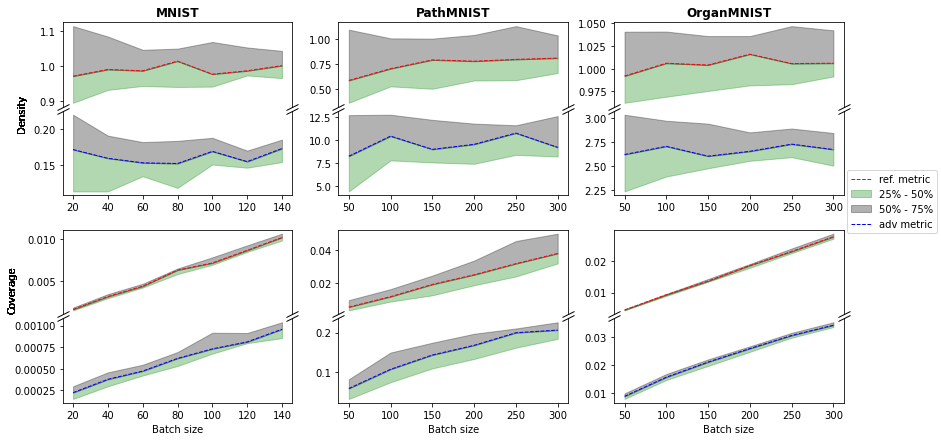

In [19]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(14,7))
outer = gridspec.GridSpec(2, 3, wspace=0.2, hspace=0.2)
c=0; f=0
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
title = ["MNIST","PathMNIST","OrganMNIST"]
handles=[]; labels=[]
for i in range(6):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.05)
    if(i>=3):
        c = f
    for inidx in range(2):
        ax = plt.Subplot(fig, inner[inidx])
        if(i<3):
            if(inidx==0):
                xx = group["den_s"+str(c+1)]
                x = group["den_q"+str(c+1)]
                lbl='ref. metric'
                lb1='25% - 50%'
                lb2='50% - 75%'
                ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
                ax.set_xticks([])
                cr='r'
                ax.set_title(title[c], fontweight='bold')
                ax.spines['bottom'].set_visible(False)
            else:
                xx = group["adv_den_s"+str(c+1)]
                x = group["adv_den_q"+str(c+1)]
                lbl='adv metric'
                cr='b'
                lb1=None
                lb2=None
                ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)
                ax.spines['top'].set_visible(False)
                ax.set_xticks(range(len(group["prefix"+str(c+1)])))
                ax.set_xticklabels(group["myticks"+str(c+1)])
                
        else:
            if(inidx==0):
                xx = group["cov_s"+str(c+1)]
                x = group["cov_q"+str(c+1)]
                lbl='ref. metric'
                cr='r'
                lb1='25% - 50%'
                lb2='50% - 75%'
                ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
                ax.set_xticks([])
                ax.spines['bottom'].set_visible(False)
            else:
                xx = group["adv_cov_s"+str(c+1)]
                x = group["adv_cov_q"+str(c+1)]
                lbl='adv metric'
                cr='b'
                lb1=None
                lb2=None
                ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)
                ax.spines['top'].set_visible(False)
                ax.set_xticks(range(len(group["prefix"+str(f+1)])))
                ax.set_xticklabels(group["myticks"+str(f+1)])
                ax.ticklabel_format(axis='y',style='sci', scilimits=[-6,3], useOffset=False)
                ax.set_xlabel('Batch size')
                


        ax.plot(range(len(group["prefix"+str(c+1)])), xx, c=cr, ls='--', lw=1, label=lbl)
        ax.fill_between(range(len(group["prefix"+str(c+1)])), x[:,0], x[:,1], color='g', alpha=0.3, label=lb1)
        ax.fill_between(range(len(group["prefix"+str(c+1)])), x[:,1], x[:,2], color='k', alpha=0.3, label=lb2)
        #ax.set_yticks(np.arange(0,3,1))
        #ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        #ax.set_ylim(np.min(x), np.max(x))
        if(i==2):
            handles.append(ax.get_legend_handles_labels())
        
        fig.text(0.08, 0.7, 'Density', va='center', rotation='vertical')
        fig.text(0.07, 0.35, 'Coverage', va='center', rotation='vertical')
        fig.add_subplot(ax)
    if(i==2):
        hand, lab = [(a+b)for a,b in zip(handles[0], handles[1])]
        fig.legend(hand,lab, loc=(0.9, 0.47), fontsize='medium')
    c+=1
    if(i>=3):
        f += 1
plt.savefig('bdy_attack_combined.png', bbox_inches = 'tight')



Use the same template for both density & coverage

Text(0.04, 0.5, 'Coverage')

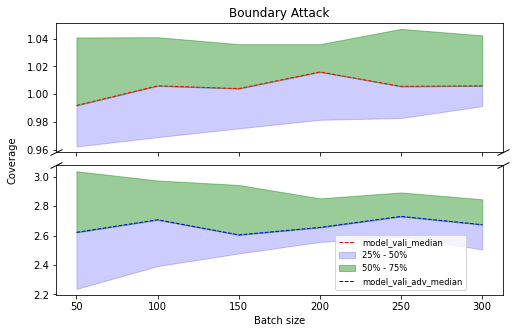

In [43]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5))
fig.subplots_adjust(hspace=0.1)  # adjust space between axes
#myticks=['20','40','60','80','100','120','140']
myticks=['50','100','150','200','250','300']
# plot the same data on both axes
#ax[0].plot(range(len(prefix)+1), np.repeat(1.0072381, 7), c='r', ls='--', lw=3, label='model_vali')
ax[0].plot(range(len(prefix)), xx[:, 1], c='r', ls='--', lw=1, label='model_vali_median')
ax[0].fill_between(range(len(prefix)), x[:, 1], x[:, 2], color='b', alpha=0.2, label='25% - 50%')
ax[0].fill_between(range(len(prefix)), x[:, 2], x[:, 3], color='g', alpha=0.4, label='50% - 75%')

#ax1.legend()
#ax[1].plot(range(len(prefix)+1), np.repeat(0.15571429, 7), c='b', ls='--', lw=3, label='model_vali_adv')
ax[1].plot(range(len(prefix)), yy[:, 1], c='b', ls='--', lw=1, label='model_vali_adv_median')
ax[1].fill_between(range(len(prefix)), y[:, 1], y[:, 2], color='b' , alpha=0.2 )#, label='25% - 50%')
ax[1].fill_between(range(len(prefix)), y[:, 2], y[:, 3], color='g', alpha=0.4 )#, label='50% - 75%')
#ax[1].fill_between(range(len(bmodel_validation_den)), bmodel_validation_adv_den_q[2], bmodel_validation_adv_den_q[3], color='k', alpha=0.6)
#ax[1].legend()

#ax[0].set_ylabel("Density")
ax[0].set_title("Boundary Attack")

# set the axis 
#ax[0].set_ylim(0.0039525693, 0.03)  # scale between max & min values
#ax[1].set_ylim(0.0060950833999999995, 0.038)  # m
#ax2.set_yticks(np.arange(0.002, 0.008, 0.002))


ax[1].set_xticks(range(len(prefix)))
ax[1].set_xticklabels(myticks)
ax[1].set_xlabel('Batch size')

# the line break
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

ax[0].plot([0, 1], [0, 0], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 1], [1, 1], transform=ax[1].transAxes, **kwargs)
handles, labels = [(a + b) for a, b in zip(ax[0].get_legend_handles_labels(), ax[1].get_legend_handles_labels())]
fig.legend(handles, labels, loc=(0.65, 0.13), fontsize='small')
fig.text(0.04, 0.5, 'Coverage', va='center', rotation='vertical')
#plt.savefig('Boundary_attack_organmnist_cov_quantiles_median.png')

## Plot for expla. of metric changes

In [107]:
coord = [[0.54,0.54],[0.51,0.67],[0.75,0.54],[0.6,0.45],[0.65,0.5],
         [0.54,0.54],[0.56,0.67],[0.75,0.54],[0.65,0.45],[0.65,0.5],
         [0.54,0.54],[0.56,0.63],[0.75,0.54],[0.65,0.45],[0.65,0.5]
        ]
d = [8,10,13]
r = [0.8,1,1.3]

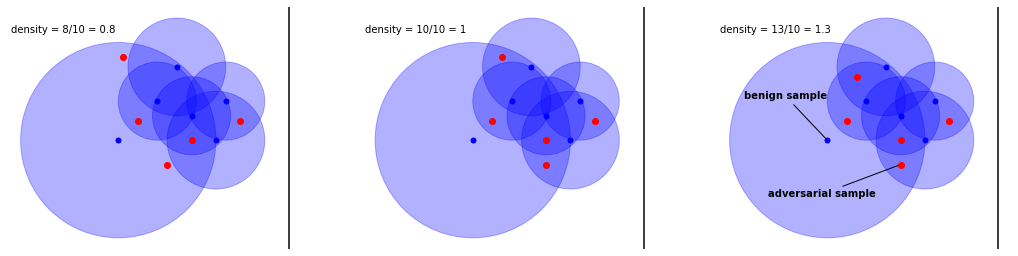

In [122]:

fig, ax = plt.subplots(1, 3, figsize=(18,9)) 

for i in range(3):
    c2 = plt.Circle((0.5, 0.5), 0.2, color='blue', alpha=0.3)
    c3 = plt.Circle((0.62, 0.65), 0.1, color='blue', alpha=0.3)
    c4 = plt.Circle((0.7, 0.5), 0.1, color='blue', alpha=0.3)
    c5 = plt.Circle((0.65, 0.55), 0.08, color='blue', alpha=0.3)
    c6 = plt.Circle((0.72, 0.58), 0.08, color='blue', alpha=0.3)
    c7 = plt.Circle((0.58, 0.58), 0.08, color='blue', alpha=0.3, label="benign sample")
    ax[i].add_patch(c2)
    ax[i].add_patch(c3)
    ax[i].add_patch(c4)
    ax[i].add_patch(c5)
    ax[i].add_patch(c6)
    ax[i].add_patch(c7)
    ax[i].set_aspect(1)
    ax[i].plot(0.5,0.5,'bo',ms=5)
    ax[i].plot(0.62,0.65,'bo',ms=5) #
    ax[i].plot(0.7,0.5,'bo',ms=5) #
    ax[i].plot(0.65,0.55,'bo',ms=5) #
    ax[i].plot(0.72,0.58,'bo',ms=5) #
    ax[i].plot(0.58,0.58,'bo',ms=5) 
    for j in range(5):
        if(i != 0):
            k = (i*j)+5
        else:
            k = (i+1)*j
        ax[i].plot(coord[k][0], coord[k][1], 'ro', label="adversarial sample")
    
    
    fig.patch.set_visible(False)
    ax[i].axis('off')
    ax[i].text(0.28, 0.72, f"density = {d[i]}/10 = {r[i]}", fontsize="medium")
    if(i==2):
        ax[i].annotate('benign sample',
                xy=(0.5, 0.5), xycoords='data',
                xytext=(0.5, 0.6),
                arrowprops=dict(arrowstyle='-',facecolor='black'), weight='bold',
                horizontalalignment='right', verticalalignment='top')
        ax[i].annotate('adversarial sample',
                xy=(0.65,0.45), xycoords='data',
                xytext=(0.6, 0.4),
                arrowprops=dict(arrowstyle='-',facecolor='black'), weight='bold',
                horizontalalignment='right', verticalalignment='top')
    
    ax[i].axvline(x=0.85, c='k')
    ax[i].set_facecolor('w')
    
# plt.savefig('den_expl.png', bbox_inches='tight')

--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

## Analysis on the sensitivity of metrics

#### Check the metrics for various split of the entire dataset

- For the mnist dataset
- This section is created to check density and coverage for the entire dataset
- The dataset is split based on various ```split_size``` using ```stratify```
- For each split, the density and coverage is computed.

#### Example: 
- for ```split_size``` of 0.4, the ```X_model``` has 42,000 images and ```X_validation``` has 28,000 images
- the tree is trained on the ```X_model```
- the query dataset is ```X_validation```

In [18]:
from torch.utils.data import ConcatDataset
# combine the datasets
"""
Load the MNIST dataset before as train & test set using torchvision

"""
dataset = ConcatDataset([train_set, test_set])
X=[]; Y=[];
for i in range(len(dataset)):
    x, y = dataset[i]
    X.append(x.numpy())  #.detach().cpu().numpy())
    Y.append(y)
myranges = np.linspace(0.05, 0.4, 10) 
density_check = []
coverage_check = []
val_length = []
for i in myranges:
        X_model, X_validation, y_model, y_validation = train_test_split(X, Y, test_size=i, random_state=42, stratify=np.array(Y))
        real = np.array(X_model).reshape(len(X_model), -1)
        gen = np.array(X_validation).reshape(len(X_validation), -1)
        den = gem_build_density(real, real.shape[0], gen, 'indexflatl2')
        cov = gem_build_coverage(real, real.shape[0], gen, 'indexflatl2')
        density_check.append(den); coverage_check.append(cov); val_length.append(len(X_validation))
        #print(f"Split size: {i:.2f} | Validation size: {len(X_validation)} | Density: {den:.5f} | Coverage: {cov:.5f}")

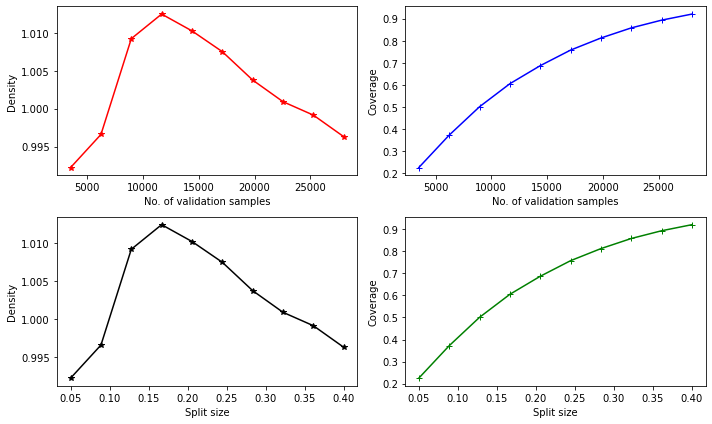

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
ax[0,0].plot(val_length, density_check, 'r-*')
ax[0,0].set_xlabel("No. of validation samples")
ax[0,0].set_ylabel("Density")


ax[0,1].plot(val_length, coverage_check, 'b-+')
ax[0,1].set_xlabel("No. of validation samples")
ax[0,1].set_ylabel("Coverage")

ax[1,0].plot(myranges, density_check, 'k-*')
ax[1,0].set_xlabel("Split size")
ax[1,0].set_ylabel("Density")


ax[1,1].plot(myranges, coverage_check, 'g-+')
ax[1,1].set_xlabel("Split size")
ax[1,1].set_ylabel("Coverage")
fig.tight_layout()
plt.savefig("Metrics_for_different_splitsizes.png")

-----------------------------------------------------------------------------------------------------------------

## Check the coverage using only 2 classes from the dataset

- Only 2 classes i.e, ```class 0``` and ```class 1``` is considered and coverage is computed for both the cases

- ```coverage00``` -> tree is trained on the entire class 0 and the query dataset is also class 0
- ```coverage005``` -> tree is trained on the entire class 0 and the query dataset is 50% of samples from class 0
- ```coverage01``` -> tree is trained on the entire class 0 and the query dataset is the samples from class 1

- ```classCom``` -> the dataset is formed by combininf class 0 and class 1
- ```coveragecom``` -> tree is trained on the entire classCom and the query dataset is the samples from class 0
- ```coveragecom5``` -> tree is trained on the entire classCom and the query dataset is 10% of samples from class 0

In [6]:
from torch.utils.data import ConcatDataset
# combine the datasets
dataset = ConcatDataset([train_set, test_set])
X=[]; Y=[];
for i in range(len(dataset)):
    x, y = dataset[i]
    X.append(x.numpy())  #.detach().cpu().numpy())
    Y.append(y)

In [21]:
X = torch.from_numpy(np.array(X)).cpu(); Y=torch.from_numpy(np.array(Y)).cpu();
#print(np.unique(Y, return_counts=True)); 
class0 = np.where(Y==0)[0]; class1 = np.where(Y==1)[0]; #print(len(class0), len(class1)); 
newX = X.reshape(X.shape[0], -1); #print(newX.shape)

classCom = torch.from_numpy(np.vstack([newX[class0], newX[class1]])).cpu()

#newX[class0].shape
coverage00 = gem_build_coverage(newX[class0], newX[class0].shape[0], newX[class0], 'indexflatl2')
coverage005 = gem_build_coverage(newX[class0], newX[class0].shape[0], newX[class0][:3452,...], 'indexflatl2')
coverage01 = gem_build_coverage(newX[class0], newX[class0].shape[0], newX[class1], 'indexflatl2')
coveragecom = gem_build_coverage(classCom, classCom.shape[0], newX[class0], 'indexflatl2')
coveragecom5 = gem_build_coverage(classCom, classCom.shape[0], newX[class0][:600,...], 'indexflatl2')
print(f"Coverage: \n Class 0 & Class 0: {coverage00} \n Class 0 & Class 0 (50%): {coverage005} \n" +
      f" Class 0 & Class 1: {coverage01} \n \n Class 0 + Class 1 combined: {coveragecom} \n" +
     f" Class 0 + Class 1 combined(10%): {coveragecom5}")

Coverage: 
 Class 0 & Class 0: 1.0 
 Class 0 & Class 0 (50%): 0.9701579213142395 
 Class 0 & Class 1: 0.0020281036850064993 
 
 Class 0 + Class 1 combined: 0.4673207104206085 
 Class 0 + Class 1 combined(10%): 0.19668470323085785


--------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------

## Model capacity analysis

this part of analysis has not been added to the paper, shall be avoided

For FGSM attack 3 models were considered
- normal, underfit & overfit models

lly, resnet models-18,34,50 were also considered

In [132]:
# model capacity for normal, underfit & overfit 
# density and coverage
normal_den = pd.read_csv('metrics_files/FGSM_attack_density.dat', header=None, skiprows=4, sep=" ")
overfit_den = pd.read_csv('metrics_files/fgsm/model_capacity/FGSM_attack_overfit_density.dat', header=None, skiprows=4, sep=" ")
underfit_den = pd.read_csv('metrics_files/fgsm/model_capacity/FGSM_attack_underfit_density.dat', header=None, skiprows=4, sep=" ")

normal_cov = pd.read_csv('metrics_files/FGSM_attack_coverage.dat', header=None, skiprows=4, sep=" ")
overfit_cov = pd.read_csv('metrics_files/fgsm/model_capacity/FGSM_attack_overfit_coverage.dat', header=None, skiprows=4, sep=" ")
underfit_cov = pd.read_csv('metrics_files/fgsm/model_capacity/FGSM_attack_underfit_coverage.dat', header=None, skiprows=4, sep=" ")

# computation of density & copverage for resnet models

#normal_den_res = pd.read_csv('metrics_files/fgsm/resnet/FGSM_attack_resnet18_density.dat', header=None, skiprows=4, sep=" ")
#overfit_den_res = pd.read_csv('metrics_files/fgsm/resnet/FGSM_attack_resnet34_density.dat', header=None, skiprows=4, sep=" ")
#underfit_den_res = pd.read_csv('metrics_files/fgsm/resnet/FGSM_attack_resnet50_density.dat', header=None, skiprows=4, sep=" ")

#normal_cov_res = pd.read_csv('metrics_files/fgsm/resnet/FGSM_attack_resnet18_coverage.dat', header=None, skiprows=4, sep=" ")
#overfit_cov_res = pd.read_csv('metrics_files/fgsm/resnet/FGSM_attack_resnet34_coverage.dat', header=None, skiprows=4, sep=" ")
#underfit_cov_res = pd.read_csv('metrics_files/fgsm/resnet/FGSM_attack_resnet50_coverage.dat', header=None, skiprows=4, sep=" ")

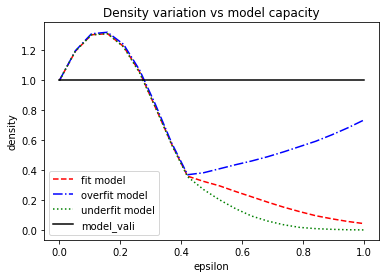

In [26]:
plt.plot(epsilon, normal_den.iloc[:, -1], c='r', ls='--', label='fit model')
plt.plot(epsilon, overfit_den.iloc[:, -1], c='b', ls='-.', label='overfit model')
plt.plot(epsilon, underfit_den.iloc[:, -1], c='g', ls=':',label='underfit model')
plt.plot(epsilon, np.repeat(normal_den.iloc[:, -1][0], len(epsilon)), c='k', label='model_vali')
plt.xlabel('epsilon')
plt.ylabel('density')
plt.title('Density variation vs model capacity')
plt.legend()
#plt.savefig('FGSM_attack_modelcapacity_density.png')

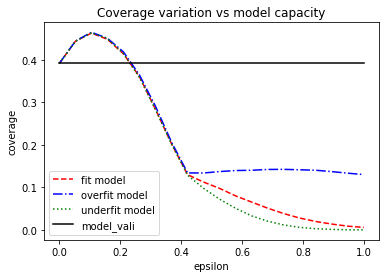

In [27]:
plt.plot(epsilon, normal_cov.iloc[:, -1], c='r', ls='--', label='fit model')
plt.plot(epsilon, overfit_cov.iloc[:, -1], c='b', ls='-.', label='overfit model')
plt.plot(epsilon, underfit_cov.iloc[:, -1], c='g', ls=':',label='underfit model')
plt.plot(epsilon, np.repeat(normal_cov.iloc[:, -1][0], len(epsilon)), c='k', label='model_vali')
plt.xlabel('epsilon')
plt.ylabel('coverage')
plt.title('Coverage variation vs model capacity')
plt.legend()
plt.savefig('FGSM_attack_modelcapacity_coverage.png')

Variation in accuracy of the model for various epsilon values

- first: for normal, underfit & overfir model
- second: for resnet models

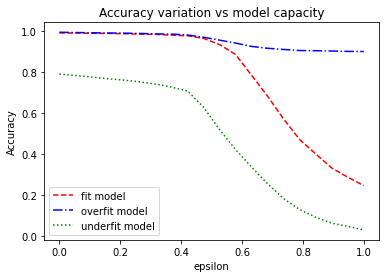

In [29]:
plt.plot(epsilon, normal_cov.iloc[:, 1], c='r', ls='--', label='fit model')
plt.plot(epsilon, overfit_cov.iloc[:, 1], c='b', ls='-.', label='overfit model')
plt.plot(epsilon, underfit_cov.iloc[:, 1], c='g', ls=':',label='underfit model')
#plt.plot(epsilon, np.repeat(normal_cov.iloc[:, -1][0], len(epsilon)), c='k', label='model_vali')
plt.xlabel('epsilon')
plt.ylabel('Accuracy')
plt.title('Accuracy variation vs model capacity')
plt.legend()
plt.savefig('FGSM_attack_modelcapacity_accuracy.png')

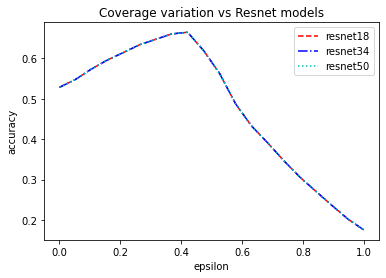

In [145]:
plt.plot(epsilon, normal_den_res.iloc[:, 1], c='r', ls='--', label='resnet18')
plt.plot(epsilon, overfit_den_res.iloc[:, 1], c='b', ls='-.', label='resnet34')
plt.plot(epsilon, underfit_den_res.iloc[:, 1], c='c', ls=':',label='resnet50')
#plt.plot(epsilon, np.repeat(normal_den.iloc[:, -1][0], len(epsilon)), c='k', label='model_vali')
plt.xlabel('epsilon')
plt.ylabel('accuracy')
plt.title('Coverage variation vs Resnet models')
plt.legend()
plt.savefig('FGSM_attack_resnetmodels_accuracy.png')

----------------------------------------------------------------------------------------------------------------------------